In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# include path to src dir
sys.path.append(os.path.abspath(os.path.join('../src')))

import sbfem.sbfem
import sbfem.utils as utils
import sbfem.mesh2d as mesh2d
import examples.Ex4 as Ex4

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Example: polygonToSBFEMesh

In [2]:
exPol2Mesh = Ex4.example_4_polygonToSBFEMesh()
polyMesh = exPol2Mesh['in']['polyMesh']
sbfemMesh = exPol2Mesh['in']['sbfemMesh']

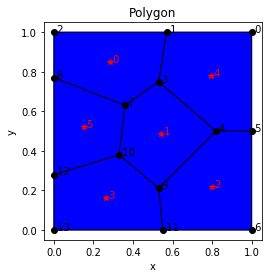

In [3]:
utils.plotPolyFEMesh(polyMesh.coord, polyMesh.vertices, {'LabelEle': 10, 'LabelNode': 10,
                                                         'title': 'Polygon',
                                                         'savePath': 'Example_4_polygonToSBFEMesh_polygon.png'})

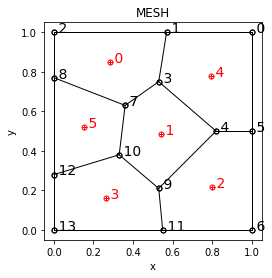

In [4]:
opt = {'sdSC': sbfemMesh.sdSC, 'LabelSC': 14, 'LineSpec': 'k-', 'PlotNode': 1, 'LabelNode': 14, 'title': 'MESH', 
       'savePath': 'Example_4_polygonToSBFEMesh_sbfemMesh.png'}
utils.plotSBFEMesh(sbfemMesh.coord, sbfemMesh.sdConn, opt)

## Example: DeepBeam

In [5]:
exDeepBeam = Ex4.example_4_DeepBeam()

triMesh = exDeepBeam['in']['triMesh']
sbfemMesh = exDeepBeam['in']['sbfemMesh']


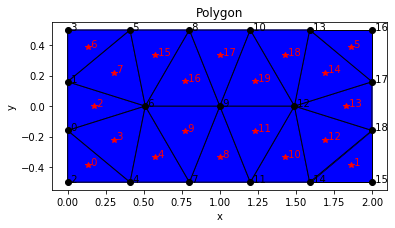

In [6]:
utils.plotPolyFEMesh(triMesh.coord, triMesh.vertices, {'LabelEle': 10, 'LabelNode': 10, 
                                                       'title': 'Polygon',
                                                       'savePath': 'Example_4_DeepBeam_polygon.png'})

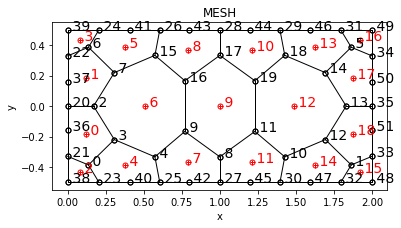

In [7]:
opt = {'sdSC': sbfemMesh.sdSC, 'LabelSC': 14, 'LineSpec': 'k-', 'PlotNode': 1, 'LabelNode': 14, 'title': 'MESH', 
       'savePath': 'Example_4_DeepBeam_sbfemMesh.png'}
utils.plotSBFEMesh(sbfemMesh.coord, sbfemMesh.sdConn, opt)

## Example: L-shaped Panel

In [8]:
exLshapedPanel = Ex4.example_4_L_shaped_Panel()

triMesh = exLshapedPanel['in']['triMesh']
sbfemMesh = exLshapedPanel['in']['sbfemMesh']


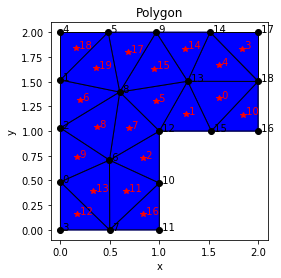

In [9]:
utils.plotPolyFEMesh(triMesh.coord, triMesh.vertices, {'LabelEle': 10, 'LabelNode': 10, 
                                                       'title': 'Polygon',
                                                      'savePath': 'Example_4_LshapedPanel_polygon.png'})

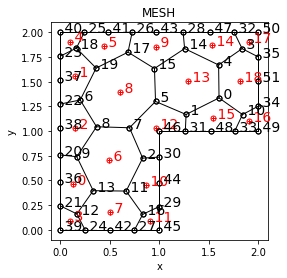

In [10]:
opt = {'sdSC': sbfemMesh.sdSC, 'LabelSC': 14, 'LineSpec': 'k-', 'PlotNode': 1, 'LabelNode': 14, 'title': 'MESH', 
       'savePath': 'Example_4_LshapedPanel_sbfemMesh.png'}
utils.plotSBFEMesh(sbfemMesh.coord, sbfemMesh.sdConn, opt)

## Example: SubdivideEdge

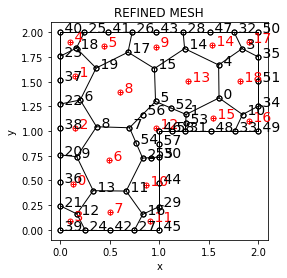

In [11]:
# use above L-shaped Panel
meshEdge, sdEdge, _, _, _ = mesh2d.meshConnectivity(sbfemMesh.sdConn)

# Two line elements per edge for S-element 13 and one line element per edge elsewhere.
nDiv = 1  # number of subdivisions of an edge
edgeDiv = nDiv * np.ones(len(meshEdge), dtype=np.int)  # initialization
# number of subdivisions of edges connected to S-element 13
edgeDiv[np.abs(sdEdge[13-1])] = 2 * nDiv
coord, sdConn = mesh2d.subdivideEdge(edgeDiv, sbfemMesh.coord, meshEdge, sdEdge)
refinedMesh = Ex4.SBFEMesh(coord, sdConn, sbfemMesh.sdSC)

opt = {'sdSC': refinedMesh.sdSC, 'LabelSC': 14, 'LineSpec': 'k-', 'PlotNode': 1, 'LabelNode': 14, 'title': 'REFINED MESH',
               'savePath': 'Example_4_LshapedPanel_subdivide1.png'}
utils.plotSBFEMesh(refinedMesh.coord, refinedMesh.sdConn, opt)

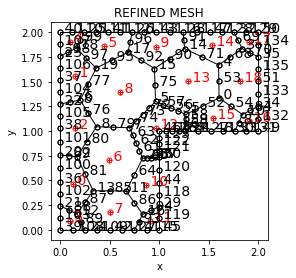

In [12]:
# Four line elements per edge for S-element 13 and two line elements per edge elsewhere.
nDiv = 1  # number of subdivisions of an edge
edgeDiv = nDiv * np.full(len(meshEdge), 2 * nDiv, dtype=np.int)  # initialization
# number of subdivisions of edges connected to S-element 13
edgeDiv[np.abs(sdEdge[13-1])] = 4 * nDiv
coord, sdConn = mesh2d.subdivideEdge(edgeDiv, sbfemMesh.coord, meshEdge, sdEdge)
refinedMesh = Ex4.SBFEMesh(coord, sdConn, sbfemMesh.sdSC)

opt = {'sdSC': refinedMesh.sdSC, 'LabelSC': 14, 'LineSpec': 'k-', 'PlotNode': 1, 'LabelNode': 14, 'title': 'REFINED MESH',
               'savePath': 'Example_4_LshapedPanel_subdivide2.png'}
utils.plotSBFEMesh(refinedMesh.coord, refinedMesh.sdConn, opt)